In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 5)

# Checking null values

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

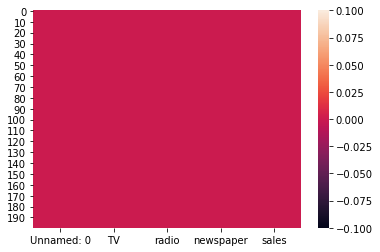

In [8]:
sns.heatmap(df.isnull())

Checking duplicates values

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Visualization

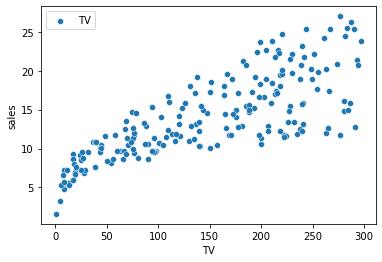

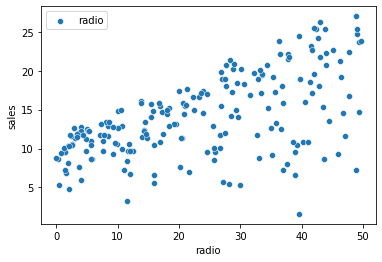

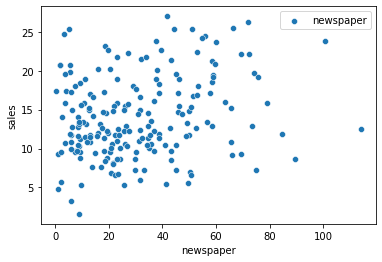

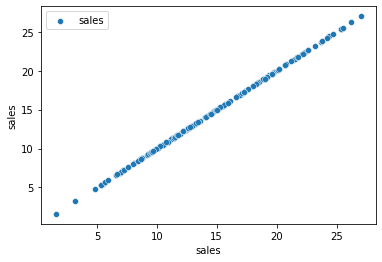

In [11]:
for i in df.columns[1:]:
    plt.plot()
    sns.scatterplot(df[i],df['sales'],label=i)
    plt.legend()
    plt.show()

from the above graph sales are linearly increase with Tv and radio advertise but in Tv advertise price also increa with sales

But in radio add cost is low compare to the Tv

in newspaper sales must be random and must be high in cost range of 0-60

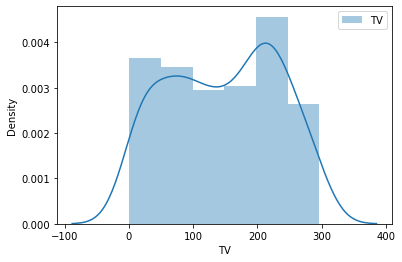

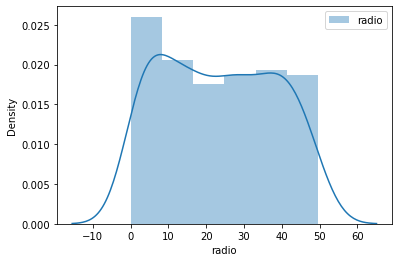

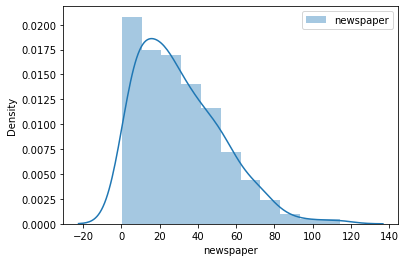

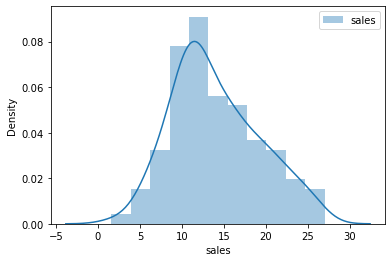

In [12]:
for i in df.columns[1:]:
    plt.figure()
    sns.distplot(df[i],label=i)
    plt.legend()
    plt.show()


From the distribution plot newpaper have some right skewness

# Check correlation

In [13]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

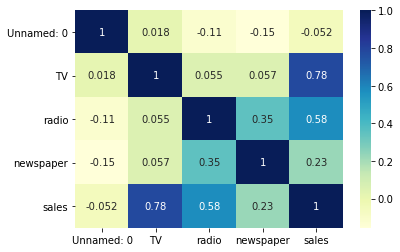

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

from above Tv is highlt corelated with sales


newspaper less corelated with sales

# Statistics

In [15]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


from the observation in Tv, radio , newspaper have much outliers as well in sales also

outliers visual

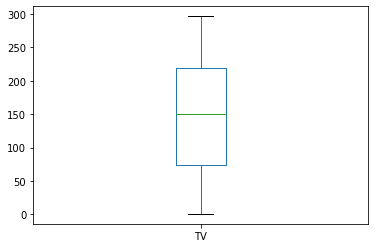

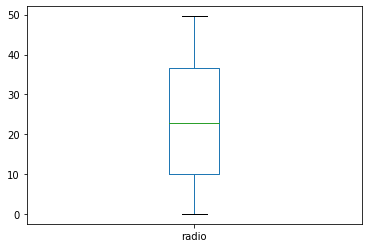

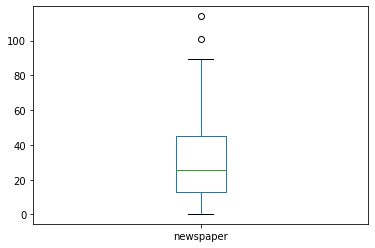

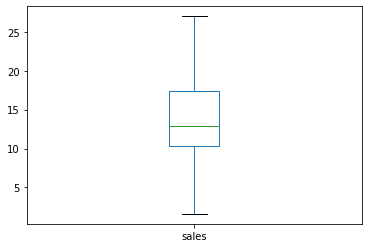

In [16]:
for i in df.columns[1:]:
    plt.plot()
    df[i].plot(kind='box')
    plt.show()

# Check multico-linearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def valcal():
    vif=pd.DataFrame()
    vif['vif factors']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [18]:
valcal()

   vif factors    features
0     2.921620  Unnamed: 0
1    23.749993          TV
2    12.959998       radio
3     3.159805   newspaper
4    61.928836       sales


from that no linerarity found betweens the columns

# Checking skewness

In [19]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

# Remove outliers

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [21]:
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [22]:
df1=df[(z<3).all(axis=1)]
df1

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [23]:
print('Data loss% :',((200-198)/200)*100)

Data loss% : 1.0


In [24]:
df1=df1.drop(['Unnamed: 0'],axis=1)

In [25]:
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [26]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

# Remove skewness

In [27]:
from sklearn.preprocessing import power_transform,StandardScaler

In [28]:
x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x)
x.skew()

0   -0.320682
1   -0.236668
2   -0.101288
dtype: float64

Scaling

In [29]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()

In [31]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_tr=lr.predict(x_train)
    pred_te=lr.predict(x_test)
    if round(r2_score(y_train,pred_tr)*100,1)==round(r2_score(y_test,pred_te)*100,1):
        print('Random state',i)
        print('Train score',r2_score(y_train,pred_tr)*100)
        print('Test score',r2_score(y_test,pred_te)*100) 

Random state 122
Train score 90.46679755177387
Test score 90.46148336224064
Random state 131
Train score 90.2176147822333
Test score 90.15147774561667
Random state 268
Train score 90.47215677407536
Test score 90.53869669310296
Random state 310
Train score 90.29724907764994
Test score 90.31896825495818
Random state 322
Train score 90.46135888628814
Test score 90.50456579807043
Random state 360
Train score 90.46716132922454
Test score 90.48481450831964
Random state 369
Train score 90.21668770225992
Test score 90.17606682730835


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=122)
lr.fit(x_train,y_train)
print('Intercept:',lr.intercept_)
print('\nTrain score:',lr.score(x_train,y_train)*100)
pred_lr=lr.predict(x_test)
print('R2_score: ',r2_score(y_test,pred_lr)*100)
print('\nError1: ',mean_absolute_error(y_test,pred_lr))
print('Error2 RMSE: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

Intercept: 13.948408085809193

Train score: 90.46679755177387
R2_score:  90.46148336224064

Error1:  1.1899806837683826
Error2 RMSE:  1.5606394758257762


Use regularization

In [33]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [34]:
l1=Lasso()
l2=Ridge()
l3=ElasticNet()
def regul(f):
    f.fit(x_train,y_train)
    print(f,'\n\t',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('R2_score :',r2_score(y_test,pred)*100)
    print('error1:\n:',mean_absolute_error(y_test,pred))
    print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred)))

In [35]:
regul(l1)

Lasso() 
	 83.49270134613906
R2_score : 83.63152265479854
error1:
: 1.4804409248648607
RSME:
: 2.0444020515043477


In [36]:
regul(l2)

Ridge() 
	 90.46258446223614
R2_score : 90.43362541223098
error1:
: 1.191326534550799
RSME:
: 1.5629167963220965


Use other regressor models

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

In [39]:
dtc=DecisionTreeRegressor()
svrp=SVR(kernel='poly')
svrl=SVR(kernel='linear')
svr=SVR()        
kn=KNeighborsRegressor(n_neighbors=5)
sgd=SGDRegressor()

In [40]:
def regressor(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('error1:\n',mean_absolute_error(y_test,pred))
    print('RSME:\n',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2 score:\n',r2_score(y_test,pred)*100)

In [41]:
regressor(dtc)

DecisionTreeRegressor() 
 100.0
error1:
 0.7850000000000003
RSME:
 1.0362592983097105
r2 score:
 95.79454929726394


In [42]:
regressor(svrp)

SVR(kernel='poly') 
 73.41681750139446
error1:
 1.6531962882705244
RSME:
 1.9759910001611996
r2 score:
 84.70865841381142


In [43]:
regressor(svrl)

SVR(kernel='linear') 
 90.31893284664152
error1:
 1.1930785904509813
RSME:
 1.5472333518175143
r2 score:
 90.62465404743327


In [44]:
regressor(svr)

SVR() 
 92.49960102346621
error1:
 0.9735903595524158
RSME:
 1.6329244034253083
r2 score:
 89.55741967969165


In [45]:
regressor(kn)

KNeighborsRegressor() 
 95.6734975329176
error1:
 0.9266666666666666
RSME:
 1.4266838005201665
r2 score:
 92.02866381589226


In [46]:
regressor(sgd)

SGDRegressor() 
 90.46387067379146
error1:
 1.189464001462536
RSME:
 1.563971302752459
r2 score:
 90.42071211232506


Use ensemble methods

In [47]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [48]:
ensemble=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [49]:
for i in ensemble:
    i.fit(x_train,y_train)
    print('\n \nscore: ',i,':\n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' R2 score:',r2_score(y_test,pred)*100)
    print('error1:\n',mean_absolute_error(y_test,pred))
    print('RSME:\n',np.sqrt(mean_squared_error(y_test,pred)))


 
score:  RandomForestRegressor() :
 99.67737708288207
 R2 score: 98.09742590474086
error1:
 0.5584000000000001
RSME:
 0.697000286943987

 
score:  AdaBoostRegressor() :
 97.90284830629564
 R2 score: 95.08302742918096
error1:
 0.9342046367819253
RSME:
 1.12049793387191

 
score:  GradientBoostingRegressor() :
 99.89669824362053
 R2 score: 97.90848724629261
error1:
 0.5747356459101771
RSME:
 0.7307897138373785


Check cross value score

In [50]:
for i in range(2,20):
    crs_score=cross_val_score(lr,x_train,y_train,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',r2_score(y_test,pred_lr)*100)

cv value: 2
cross value score: 89.86871417686831
actual score: 90.46148336224064
cv value: 3
cross value score: 89.06792692328133
actual score: 90.46148336224064
cv value: 4
cross value score: 89.57916219261759
actual score: 90.46148336224064
cv value: 5
cross value score: 89.38424372310422
actual score: 90.46148336224064
cv value: 6
cross value score: 89.24944014459305
actual score: 90.46148336224064
cv value: 7
cross value score: 89.41400029411193
actual score: 90.46148336224064
cv value: 8
cross value score: 89.51000581725988
actual score: 90.46148336224064
cv value: 9
cross value score: 89.30205738974722
actual score: 90.46148336224064
cv value: 10
cross value score: 89.11555336978041
actual score: 90.46148336224064
cv value: 11
cross value score: 88.03275798516978
actual score: 90.46148336224064
cv value: 12
cross value score: 88.0275027744921
actual score: 90.46148336224064
cv value: 13
cross value score: 89.31124169381981
actual score: 90.46148336224064
cv value: 14
cross value 

In [51]:
score2=cross_val_score(lr,x_train,y_train,cv=2)
print(score2.mean())

0.898687141768683


In [52]:
score2=cross_val_score(dtc,x_train,y_train,cv=2)
print(score2.mean())

0.9117346494546035


In [53]:
score2=cross_val_score(svr,x_train,y_train,cv=9)
print(score2.mean())

0.9004781969880093


In [54]:
score2=cross_val_score(svrl,x_train,y_train,cv=9)
print(score2.mean())

0.8876431107932677


In [55]:
score2=cross_val_score(svrp,x_train,y_train,cv=9)
print(score2.mean())

0.6717168390746978


In [56]:
score2=cross_val_score(kn,x_train,y_train,cv=9)
print(score2.mean())

0.9291222269191421


In [57]:
score2=cross_val_score(sgd,x_train,y_train,cv=9)
print(score2.mean())

0.8930314297169077


In [58]:
score2=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=9)
print(score2.mean())

0.9742399439116305


In [59]:
score2=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=9)
print(score2.mean())

0.9512564791960583


In [60]:
score2=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=9)
print(score2.mean())

0.97490148267333


In [61]:
score2=cross_val_score(l1,x_train,y_train,cv=9)
print(score2.mean())

0.8233348278368445


In [62]:
score2=cross_val_score(l2,x_train,y_train,cv=9)
print(score2.mean())

0.8930303158900603


In [63]:
score2=cross_val_score(l3,x_train,y_train,cv=9)
print(score2.mean())

0.7373079171253878


In [65]:
from sklearn.model_selection import GridSearchCV

# Apply gridsearch on randomforest and gradient boosting base on cv score and r2 score

In [67]:
p1={'loss':['ls','lad','huber'],'learning_rate':[0.1,0.01,0.001,],'criterion':['friedman_mse','mse'],'max_features':['auto','sqrt','log2'],'random_state':[42]}
m1=GradientBoostingRegressor()
grid=GridSearchCV(estimator=m1,param_grid=p1)
grid.fit(x_train,y_train)
print(m1,grid.best_score_)
print(grid.best_params_)

GradientBoostingRegressor() 0.9734845343386456
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'ls', 'max_features': 'auto', 'random_state': 42}


In [74]:
p2={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'criterion':['mae','mse'],
 'n_estimators': [100,150,200,250,300]}
m2=GradientBoostingRegressor()
grid=GridSearchCV(estimator=m2,param_grid=p2)
grid.fit(x_train,y_train)
print(m1,grid.best_score_)
print(grid.best_params_)

GradientBoostingRegressor() 0.9511761548610824
{'criterion': 'mae', 'max_depth': 80, 'max_features': 'auto', 'n_estimators': 100}


In [75]:
gr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='ls', max_features= 'auto',random_state=42)
gr.fit(x_train,y_train)
print(gr,'\n\t',gr.score(x_train,y_train)*100)
pred_gr=gr.predict(x_test)
print('R2_score :',r2_score(y_test,pred_gr)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_gr))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_gr)))

GradientBoostingRegressor(max_features='auto', random_state=42) 
	 99.89669824362053
R2_score : 97.88097056178277
error1:
: 0.5799457326473826
RSME:
: 0.7355812699750669


In [91]:
rf=RandomForestRegressor(criterion='mae', max_depth=80, max_features= 'auto',random_state=42,n_estimators=100)
rf.fit(x_train,y_train)
print(rf,'\n\t',rf.score(x_train,y_train)*100)
pred_rf=rf.predict(x_test)
print('R2_score :',r2_score(y_test,pred_rf)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_rf))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_rf)))

RandomForestRegressor(criterion='mae', max_depth=80, random_state=42) 
	 99.68867579630336
R2_score : 98.05569400271268
error1:
: 0.5904500000000006
RSME:
: 0.7046029792254174


In [92]:
result=pd.DataFrame({'Model':['LR','L1','L2','DTC','SVRP','SVRL','SVR','KN','SGD','RFR','ADBR','GDBR'],
             'R2 score':[90.46,86.63,90.43,95.79,84.70,90.62,89.55,92.04,90.42,98.09,95.08,97.90],
             'CV score':[89.86,82.33,89.30,91.17,67.17,88.76,90.09,92.91,89.30,97.42,95.12,97.49],
             'RMSE':[1.56,2.04,1.56,1.03,1.97,1.19,1.63,1.42,1.56,0.70,1.12,0.73]})

In [94]:
result['Difference']=result['R2 score']-result['CV score']


In [95]:
result

,Model,R2 score,CV score,RMSE,Difference
0,LR,90.46,89.86,1.56,0.60
1,L1,86.63,82.33,2.04,4.30
2,L2,90.43,89.30,1.56,1.13
3,DTC,95.79,91.17,1.03,4.62
4,SVRP,84.70,67.17,1.97,17.53
5,SVRL,90.62,88.76,1.19,1.86
6,SVR,89.55,90.09,1.63,-0.54
7,KN,92.04,92.91,1.42,-0.87
8,SGD,90.42,89.30,1.56,1.12
9,RFR,98.09,97.42,0.70,0.67


FRom the sCORE TABLE  GRADIENTBOOSTING MODEL IS PERFORM WELL AND LESS ERROR 

Text(0.5, 1.0, 'Regression plot of GradientBoosting')

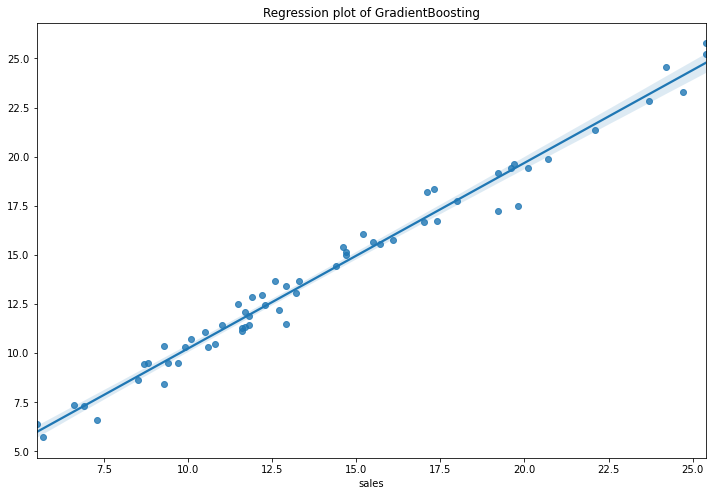

In [96]:
plt.figure(figsize=(12,8))
sns.regplot(y_test,pred_gr)
plt.title('Regression plot of GradientBoosting')

In [97]:
import joblib
joblib.dump(gr,'GRBRAdd.obj')
GRBRAdd=joblib.load('GRBRAdd.obj')
pd.DataFrame({'Actual':y_test,'Predicted':pred_gr})

,Actual,Predicted
96,11.7,11.332673
31,11.9,12.867898
2,9.3,8.415943
44,8.5,8.639132
122,11.6,11.138592
19,14.6,15.410604
65,9.3,10.365293
161,13.3,13.665369
23,15.5,15.639468
36,25.4,25.227688
